In [1]:
import sys, os

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.insert(0, BASE_DIR) # Add src/ directory to python path so we can import our modules

from src.utils.constants import Datasets, Emotions, Columns
import src.utils.data_processing as dp
import pandas as pd

In [2]:
combined_df = pd.concat(
    [
        dp.get_crema(BASE_DIR, 'data/raw/Crema'),
        dp.get_ravdess(BASE_DIR, 'data/raw/Ravdess'),
        dp.get_savee(BASE_DIR, 'data/raw/Savee'),
        dp.get_tess(BASE_DIR, 'data/raw/Tess')
    ],
    ignore_index=True
)
combined_df.to_csv(os.path.join(BASE_DIR, 'data/metadata/dataset.csv'), index=False)

In [3]:
# take 70 percent of the data from each emotion for training
# take 15 percent of the data from each emotion for validation
# take 15 percent of the data from each emotion for testing

# get dataframe of each emotion
train_dfs = []
val_dfs = []
test_dfs = []
for emotion in Emotions():
    df = combined_df[combined_df[Columns.EMOTIONS] == emotion]
    # randomly sort df by index
    df = df.sample(frac=1, random_state=1)
    # split df into 70/15/15, make sure no overlap
    train_dfs.append(df.sample(frac=0.7, random_state=1))
    val_dfs.append(df.drop(train_dfs[-1].index).sample(frac=0.5, random_state=1))
    test_dfs.append(df.drop(train_dfs[-1].index).drop(val_dfs[-1].index))

train_df = pd.concat(train_dfs, ignore_index=True)
val_df = pd.concat(val_dfs, ignore_index=True)
test_df = pd.concat(test_dfs, ignore_index=True)

# save to csv
train_df.to_csv(os.path.join(BASE_DIR, 'data/metadata/train.csv'), index=False)
val_df.to_csv(os.path.join(BASE_DIR, 'data/metadata/val.csv'), index=False)
test_df.to_csv(os.path.join(BASE_DIR, 'data/metadata/test.csv'), index=False)

In [4]:
# test if the dataframes are correct by combining them and checking if they are the same as the original
new_combined_df = pd.concat([train_df, val_df, test_df], ignore_index=True)

# sort by path
new_combined_df = new_combined_df.sort_values(by=[Columns.PATH])
combined_df = combined_df.sort_values(by=[Columns.PATH])

# reset index
new_combined_df = new_combined_df.reset_index(drop=True)
combined_df = combined_df.reset_index(drop=True)

# check if the dataframes are the same
print(new_combined_df.equals(combined_df))
print(len(new_combined_df) == len(combined_df))


True
True


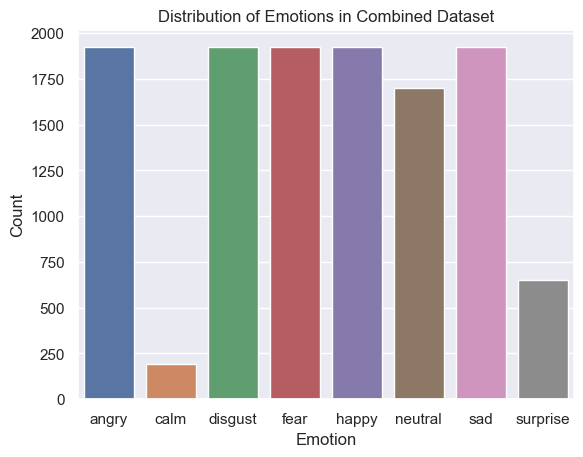

In [36]:
# plot the distribution of the data
import matplotlib.pyplot as plt
import seaborn as sns

# sort combined_df by emotion
combined_df = combined_df.sort_values(by=[Columns.EMOTIONS])
sns.set_theme(style="darkgrid")
sns.countplot(x=Columns.EMOTIONS, data=combined_df)
plt.title('Distribution of Emotions in Combined Dataset')

plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

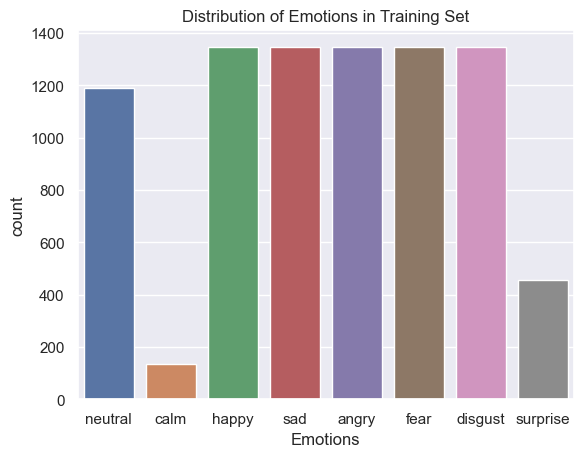

In [6]:
# plot the distribution of the data in each set
sns.countplot(x=Columns.EMOTIONS, data=train_df)
plt.title('Distribution of Emotions in Training Set')
plt.show()

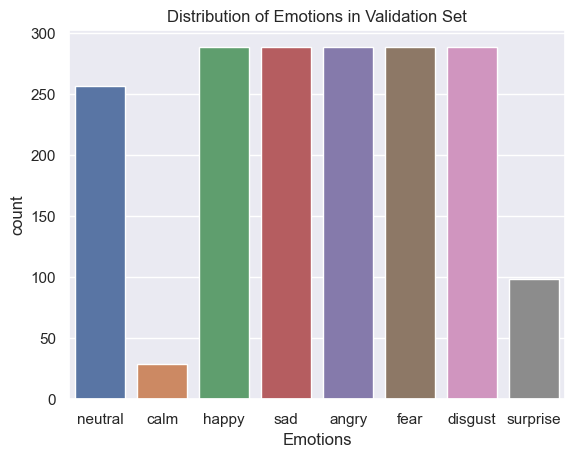

In [7]:
sns.countplot(x=Columns.EMOTIONS, data=val_df)
plt.title('Distribution of Emotions in Validation Set')
plt.show()

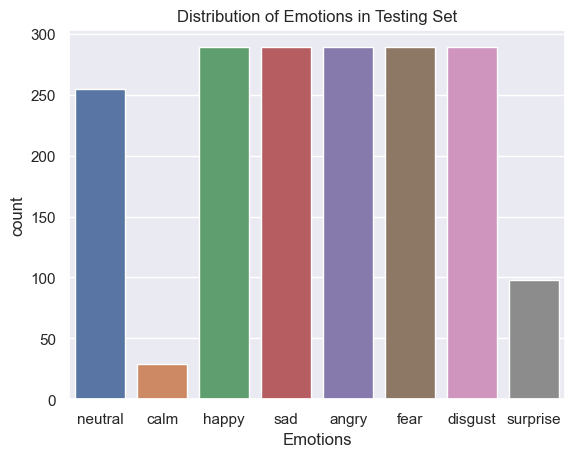

In [8]:
sns.countplot(x=Columns.EMOTIONS, data=test_df)
plt.title('Distribution of Emotions in Testing Set')
plt.show()

Emotions
angry       1923
disgust     1923
fear        1923
happy       1923
sad         1923
neutral     1703
surprise     652
calm         192
Name: count, dtype: int64

Emotions
angry       15.811544
disgust     15.811544
fear        15.811544
happy       15.811544
sad         15.811544
neutral     14.002631
surprise     5.360960
calm         1.578688
Name: count, dtype: float64


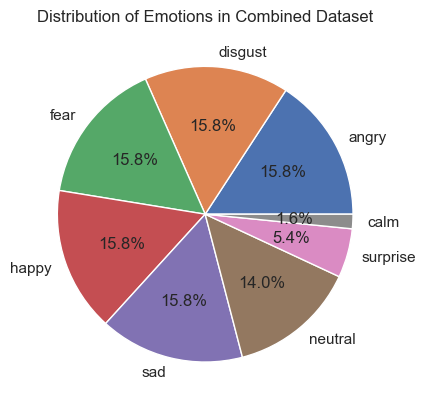

In [9]:
# plot the distribution of the data in the overall set as a percentage
# use a pie chart
# get the counts of each emotion in the combined dataset
emotion_counts = combined_df[Columns.EMOTIONS].value_counts()
print(emotion_counts)
# get the percentages of each emotion in the combined dataset
emotion_percentages = emotion_counts / len(combined_df) * 100

print()
print(emotion_percentages)

# plot the pie chart
plt.pie(emotion_percentages, labels=emotion_percentages.index.to_list(), autopct='%1.1f%%')
plt.title('Distribution of Emotions in Combined Dataset')
plt.show()

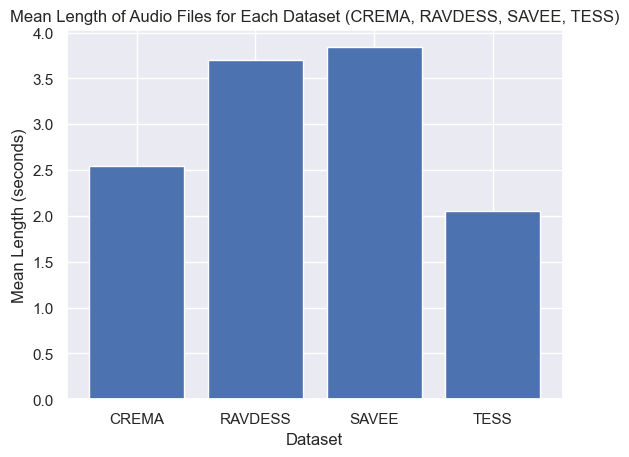

In [10]:
# plot the mean length of audio files for each dataset (CREMA, RAVDESS, SAVEE, TESS)

# get the mean length of audio files for each dataset
crema_mean = combined_df[combined_df[Columns.DATASET] == Datasets.CREMA][Columns.AUDIO_LENGTH].mean()
ravdess_mean = combined_df[combined_df[Columns.DATASET] == Datasets.RAVDESS][Columns.AUDIO_LENGTH].mean()
savee_mean = combined_df[combined_df[Columns.DATASET] == Datasets.SAVEE][Columns.AUDIO_LENGTH].mean()
tess_mean = combined_df[combined_df[Columns.DATASET] == Datasets.TESS][Columns.AUDIO_LENGTH].mean()

# plot the mean length of audio files for each dataset
plt.bar([Datasets.CREMA, Datasets.RAVDESS, Datasets.SAVEE, Datasets.TESS], [crema_mean, ravdess_mean, savee_mean, tess_mean])
plt.title('Mean Length of Audio Files for Each Dataset (CREMA, RAVDESS, SAVEE, TESS)')
plt.xlabel('Dataset')
plt.ylabel('Mean Length (seconds)')
plt.show()

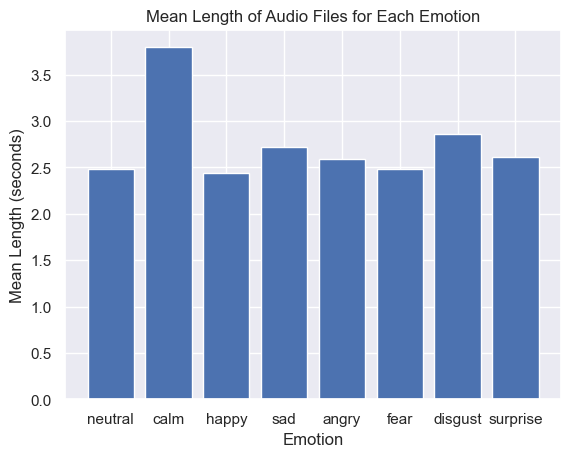

In [29]:
# plot the mean length of audio files for each emotion

# get the mean length of audio files for each emotion
emotion_means = []
for emotion in Emotions():
    emotion_means.append(combined_df[combined_df[Columns.EMOTIONS] == emotion][Columns.AUDIO_LENGTH].mean())

# plot the mean length of audio files for each emotion
plt.bar(Emotions.to_list(), emotion_means)
plt.title('Mean Length of Audio Files for Each Emotion')
plt.xlabel('Emotion')
plt.ylabel('Mean Length (seconds)')
plt.show()

